In [1]:
import numpy as np
import pandas as pd

In [2]:
# sep is delimiter it could be ',' ':' '/' 
auto_price = pd.read_csv("/Users/ahmetokur/Desktop/Datasets/Automobile_price_data__Raw_.csv", sep = ",")  # we can use URL here as an alternative

In [3]:
auto_price.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [41]:
# True if any column has missing value
auto_price.isna().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [4]:
# Replace '?' by np.nan
auto_price.replace('?', np.nan, inplace = True)

In [5]:
auto_price.select_dtypes(include = ['object'])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400,16845
201,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,160,5300,19045
202,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,3.58,2.87,134,5500,21485
203,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,3.01,3.40,106,4800,22470


In [6]:
# convert object columns to numerical columns
cols = ['bore','stroke','horsepower','peak-rpm','price']
auto_price[cols] = auto_price[cols].apply(pd.to_numeric)

In [7]:
auto_price.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Central Tendecy

In [8]:
auto_price['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [9]:
# Just to test groupby 😊😁
auto_price.groupby(['body-style']).size()

body-style
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
dtype: int64

In [10]:
auto_price['body-style'].mode()

0    sedan
Name: body-style, dtype: object

In [11]:
# Mean Value
auto_price['price'].mean()

13207.129353233831

In [12]:
# Median Value
auto_price['price'].median()

10295.0

## Handling Missing Values

In [13]:
auto_price['normalized-losses'].unique()


array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [14]:
# Typecast column from object data types to float
auto_price['normalized-losses'] = auto_price['normalized-losses'].astype('float64')


In [15]:
auto_price['normalized-losses'].mean()

122.0

In [16]:

auto_price['normalized-losses'].replace(np.nan, auto_price['normalized-losses'].mean(), inplace = True)

In [17]:
auto_price.isnull().sum()


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

### dropna()
* It drops missing values / rows

In [18]:
# dropna() is the last option
auto_price.dropna(inplace = True)

In [19]:
auto_price.shape

(193, 26)

### Basic Imputation Techniques
* Imputation by using statistics(mean, median, most_frequent(mode)) of each column with missing values.
* Imputation with constatnt value

In [20]:
diabetes = pd.read_csv("/Users/ahmetokur/Desktop/Datasets/Diabetes_Preprocessing.csv", sep = ",")

In [21]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


In [22]:
diabetes.isnull().sum().sort_values(ascending = False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Pregnancies                   0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [23]:
diabetes['Insulin'].unique()

array([ nan,  94., 168.,  88., 543., 846., 175.,  23.,  83.,  96., 235.,
       146., 115.,  14.,  11., 245.,  54., 192.,  27.,   7.,  24.,  82.,
        36.,   3., 342.,  34., 142., 128.,  38.,   1.,   9.,  71., 125.,
       176.,  48.,  64., 228.,  76.,  22.,   4., 152.,  18., 135., 495.,
        37.,  51.,  99., 145., 225.,  49.,   5.,  92., 325.,  63., 284.,
       119., 155., 485.,  53., 114.,  15., 285., 156.,  78.,  13.,  55.,
        58.,  16.,  21., 318.,  44.,  19.,  28.,  87., 271., 129.,  12.,
       478.,  56.,  32., 744.,  45., 194.,  68.,  42., 258., 375.,  67.,
        57., 116., 278., 122., 545.,  75.,  74., 182., 215., 184., 132.,
       148.,  25.,  85., 231.,  29.,  52., 255., 171.,  73.,  43., 167.,
       249., 293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196.,
       415., 275., 165., 579.,  31.,  61., 474.,  17., 277.,   6.,  95.,
       237., 191., 328., 265., 193.,  79.,  86., 326., 188.,  65., 166.,
       274.,  77., 126.,  33., 185.,  41., 272., 32

In [24]:
diabetes['Insulin'].replace(np.nan, diabetes['Insulin'].mean(), inplace = True)

In [25]:
diabetes.isnull().sum().sort_values(ascending = False)

SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Pregnancies                   0
Insulin                       0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [26]:
from sklearn.impute import SimpleImputer
# strategy = 'mean', 'median', 'most_frequent'
impute = SimpleImputer(strategy='median')
# fit = train, transform = apply transformation
data_array = impute.fit_transform(diabetes)

In [27]:
data_array

array([[  6.   , 148.   ,  72.   , ...,   0.627,   5.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,   3.   ,   0.   ],
       [  1.   , 126.   ,   6.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,   7.   , ...,   0.315,  23.   ,   0.   ]])

In [28]:
diabetes_df = pd.DataFrame(data_array, columns = diabetes.columns)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,105.659898,33.6,0.627,5.0,1.0
1,1.0,85.0,66.0,29.0,105.659898,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,27.0,105.659898,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,4.0,35.0,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,11.0,76.0,48.0,18.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,7.0,27.0,105.659898,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.000000,26.2,0.245,3.0,0.0
766,1.0,126.0,6.0,27.0,105.659898,3.1,0.349,47.0,1.0


In [29]:
diabetes_df.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Outliers

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:>

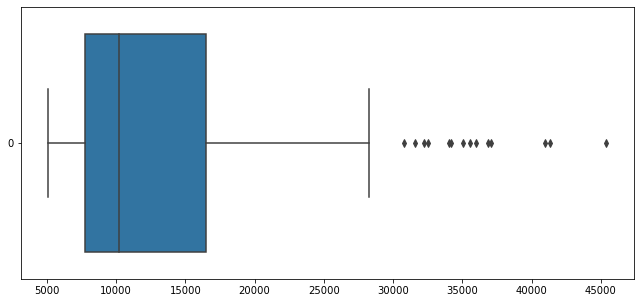

In [31]:
# figsize = (width,height)
plt.figure(figsize = (11,5))
# orient = orientation of plot h = horizontal
sns.boxplot(data = auto_price['price'], orient = 'h')

In [32]:
q1 = auto_price['price'].quantile(.25)
q3 = auto_price['price'].quantile(.75)

In [33]:
q1

7738.0

In [34]:
q3

16515.0

In [35]:
def find_outliers(df, cols):
    q1 = df[cols].quantile(.25)
    q3 = df[cols].quantile(.75)
    iqr = q3 - q1
    min_r = q1 - 1.5 * iqr
    max_r = q3 + 1.5 * iqr
    outliers_indices = df.index[(df[cols] < min_r) | (df[cols] > max_r)]
    return outliers_indices

In [36]:
find_outliers(auto_price, 'price')

Int64Index([15, 16, 17, 47, 48, 49, 70, 71, 72, 73, 74, 126, 127, 128], dtype='int64')

### Treating Outliers
* remove / trim the outliers
* trim the data tkae only(5% to 95%)
* mean/median apply imputation

In [37]:
from scipy import stats
import numpy as np

In [38]:
# only columns wicch are numeric datatype
auto_price_numeric = auto_price.select_dtypes(include = ['int64','float64'])

In [39]:
z = np.abs(stats.zscore(auto_price_numeric))


In [40]:
# z-score > +3 or z-score < -3
np.where((z > 3) | (z < -3))

(array([ 15,  17,  17,  28,  28,  43,  44,  45,  45,  64,  64,  64,  65,
         65,  81,  97, 102, 104, 122, 146, 147, 153, 154, 162, 170, 172,
        175, 178, 180, 191]),
 array([15, 13, 14, 13, 14,  7,  7,  7, 11,  2,  7, 15,  7, 15, 13,  1,  9,
         9,  9, 10, 10, 12, 12, 10, 10, 10, 10,  1, 10, 10]))